## 임계값과 히스토그램 처리

### 임계값 영상

- cv2.threshold(src, thresh, max_val, type[,dst ])

##### src는 1-채널의 np.uint8 또는 np.float32의 입력 영상이고, dst는 src와 같은 자료형, 같은 크기의 출력 영상이다.
##### thresh는 임계값, type은 임계값의 종류이다.
##### type에 cv2.THRESH_OTSU를 추가하면 임계값 thresh와 관계 없이 Otsu 알고리즘으로 최적 임계값을 계산하고, retval에 반환한다.
##### Otsu 방법은 8비트에서 구현되어 있다

- cv2.adaptiveThreshold(src, max_val, adaptiveMethod, thresholdType, blockSize, C[, dst])

##### adaptiveThreshold() 함수는 적응형 임계값 영상을 계산한다.
##### 화소의 이웃을 사용하므로 포인트 프로세싱을 하는 것이 아니지만, 임계값 영상과 관련이 있다
##### 입력 영상 src는 8비트 1-채널 영상이며, blockSize x blockSize 크기의 이웃에서 계산한 평균 또는 가중평균에서 함수의 인자인 C 값을 뺄셈하여 임계값을 계산하고, thresholdType에 따라 출력 영상 dst를 계산한다.
##### adaptiveMethod는 적응형 임계값 종류이다. cv2.ADAPTIVE_THRESH_MEAN_C이면, blockSize x blockSize 크기의 이웃에서 평균을 계산한 다음 함수의 인자인 C 값을 뺄셈한 값이 임계값 T(y, x)가 된다.
##### cv2.ADAPTIVE_THRESH_GAUSSIAN_C이면 blockSize x blockSize 크기의 이웃에서 가우시안 가중평균을 계산한 다음 C 값을 뺄셈한 값이 임계값(y, x)가 된다.
##### block_size는 이웃의 크기로 3, 5, 7, 9등과 같이 홀수이다.

#### 실습

In [21]:
## 임계값 영상
# 0501.py
import cv2
import numpy as np
src = cv2.imread('./data/heart10.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',  src)

ret, dst = cv2.threshold(src, 120, 255, cv2.THRESH_BINARY)      # thresh = 120, max_val = 255, type = cv2.THRESH_BINARY으로 임계값 적용
print('ret=', ret)
cv2.imshow('dst',  dst)

ret2, dst2 = cv2.threshold(src, 200, 255,
                             cv2.THRESH_BINARY+cv2.THRESH_OTSU) # thresh = 200, max_val = 255, type = cv2.THRESH_BINARY +cv2.THRESH_OTSU
print('ret2=', ret2)                                            # 주어진 임계값 200과 상관없이 otsu 알고리즘에 의해 최적화된 임계값이 적용된다.
cv2.imshow('dst2',  dst2)

cv2.waitKey()    
cv2.destroyAllWindows()


ret= 120.0
ret2= 175.0


In [24]:
## 적응형 임계값 영상
# 0502.py
import cv2
import numpy as np
src = cv2.imread('./data/srcThreshold.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',  src)

ret, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) # thresh = 0, max_val = 255이지만 cv2.THRESH_BINARY+cv2.THRESH_OTSU에 의해
cv2.imshow('dst',  dst)                                                  # 최적화된 임계값이 적용된다.

dst2 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, 7) # 임계값 = 255, adaptiveMethod = cv2.ADAPTIVE_THRESH_MEAN.C,
cv2.imshow('dst2',  dst2)                                                                    # thresholdType = cv2.THRESH_BINARY, blockSize = 51, C = 7로
                                                                                             # 각각의 화소 별로 적응형 임계값을 적용한다.
dst3 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 7) # 여기서 C는 평균이나 가중평균에서 차감할 값이다.
cv2.imshow('dst3',  dst3)

cv2.waitKey()    
cv2.destroyAllWindows()


### 히스토그램 계산

- cv2.calHist(images, channels, mask, histSize, reanges[, hist[, accumulate ]])

##### image는 히스토그램을 계산할 영상의 배열이다.  영상은 같은 크기, 같은 깊이의 8비트 부호 없는 정수 또는 32비트 실수 자료형이다.
##### channels는 히스토그램을 계산할 채널 번호를 갖는 정수형 배열이다.
##### mask는 images[i]와 같은 크기의 8비트 영상으로, mask(x, y) != 0 인 image[i](x, y)만을 히스토그램 계산에 사용한다.
##### mask = None이면 마스크를 사용하지 않고, 모든 화소에서 히스토그램을 계산한다.
##### histSize는 결과 히스토그램 hist의 각 빈(bin) 크기에 대한 정수 배열이다.
##### ranges는 히스토그램의 각 빈의 경계값 배열의 배열이다. OpenCV 파이썬은 등간격 히스토그램을 계산한다.
##### accumulate = True 이면, calcHist() 함수를 수행할 때 히스토그램을 초기화하지 않고, 이전 값을 계속 누적한다.
##### hist는 결과 히스토그램이다.

In [29]:
## 히스토그램 계산1
# 0503.py
import cv2
import numpy as np

src = np.array([[0, 0, 0, 0],
              [1, 1, 3, 5],
              [6, 1, 1, 3],
              [4, 3, 1, 7]
              ], dtype=np.uint8)

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None, # 4x4 배열 src의 0번 채널에서 마스크 지정 없이, 히스토그램 빈 크기 histSize와 범위 ranges로 
                    histSize=[4], ranges=[0, 8])            # 히스토그램을 계산한다. 범위 [0,8]에서 0은 포함,8은 포함되지 않는다
print('hist1 = ', hist1)

hist2 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[4], ranges=[0, 4])
print('hist2 = ', hist2)


hist1 =  [[9.]
 [3.]
 [2.]
 [2.]]
hist2 =  [[4.]
 [5.]
 [0.]
 [3.]]


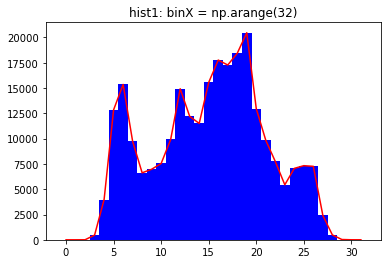

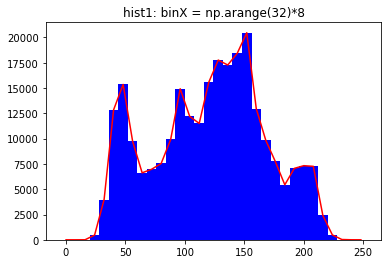

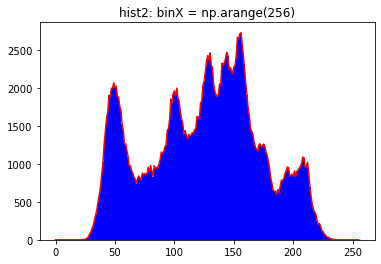

In [3]:
## 히스토그램 계산 2: 그레이스스케일 영상
# 0504.py
import cv2
import numpy as np
from   matplotlib import pyplot as plt

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None, # 그레이스케일 영상 src의 0번 채널에서 마스크 지정없이, 히스토그램 빈 크기 histSize = [32],
                    histSize=[32], ranges=[0, 256])         # 범위 ranges = [0, 256]으로 히스토그램 hist1을 계산한다.

hist2 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
#1
hist1 = hist1.flatten()                                     # hist1, hist2의 모양이 각각 hist1.shape = (32,), hist2.shape = (256, )인 1차원 행 배열로 변경한다.
hist2 = hist2.flatten()

#2
plt.title('hist1: binX = np.arange(32)')                    # matplotlib을 사용하여 히스토그램 hist1을 plt.plot()는 꺾은선 그래프, plt.bar()는 막대그래프로 표시
plt.plot(hist1, color='r')
binX = np.arange(32)                                        # 가로축은 binX = np.arange(32)에 의해 빈의 인덱스이다.

plt.bar(binX, hist1, width=1, color='b')
plt.show()

#3
plt.title('hist1: binX = np.arange(32)*8')                  
binX = np.arange(32)*8                                      # 가로축 binX = np.arange(32)*8에 의해 각 빈에 카운트된 값의 범위 정보이다.
plt.plot(binX, hist1, color='r')
plt.bar(binX, hist1, width=8, color='b')                    # 막대그래프의 너비는 8이다.
plt.show()

#4
plt.title('hist2: binX = np.arange(256)')
plt.plot(hist2, color='r')
binX = np.arange(256)
plt.bar(binX, hist2, width=1, color='b')
plt.show()


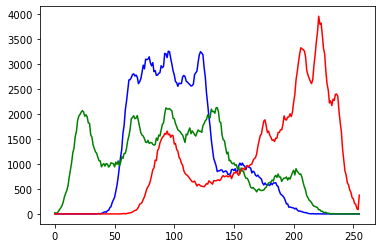

In [28]:
## 히스토그램 계산 3: 컬러 영상
# 0505.py
import cv2
import numpy as np
from   matplotlib import pyplot as plt

src = cv2.imread('./data/lena.jpg')
histColor = ('b', 'g', 'r')
for i in range(3):
    hist = cv2.calcHist(images=[src], channels=[i], mask=None, # for문에서 컬러 영상 src의 i번 채널에서 마스크 지정 없이,
                    histSize=[256], ranges=[0, 256])           # 히스토그램 빈 크기 histSize = [256], 범위 ranges = [0,256]으로 히스토그램을 계산한다.
    plt.plot(hist, color = histColor[i])    
plt.show()


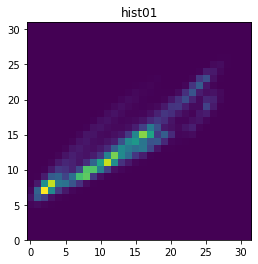

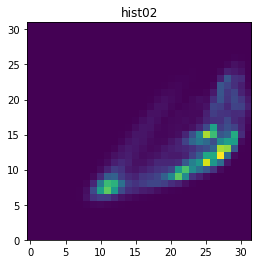

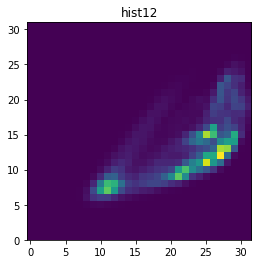

In [15]:
## 히스토그램 계산 3: 컬러 영상의 2채널 히스토그램
# 0506.py
import cv2
from   matplotlib import pyplot as plt

bgr = cv2.imread('./data/lena.jpg')
##hsv    = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

#1
hist01 = cv2.calcHist([bgr], [0,1], None,              # cv2.calcHist() 함수로 bgr의 [0, 1] 채널에서 histSize = [32, 32], 범위 ranges = [0, 256, 0, 256]으로
	[32, 32], [0, 256, 0, 256])                        # 히스토그램을 계산하고 표시한다
##cv2.normalize(hist01, hist01, 0, 1, cv2.NORM_MINMAX)
##fig = plt.figure()
##fig.canvas.set_window_title('2D Histogram')

plt.title('hist01')
plt.ylim(0, 31)
plt.imshow(hist01, interpolation = "nearest")
plt.show()

#2
hist02 = cv2.calcHist([bgr], [0,2], None,              # cv2.calcHist() 함수로 bgr의 [0, 2] 채널에서 histSizr = [32, 32], 범위 ranges = [0, 256, 0, 256]으로
	[32, 32], [0, 256, 0, 256])                        # 히스토그램을 계산하고 표시한다.
plt.title('hist02')
plt.ylim(0, 31)
plt.imshow(hist02, interpolation = "nearest")
plt.show()

#3
hist12 = cv2.calcHist([bgr], [1,2], None,              # cv2.calcHist() 함수로 bgr의 [1, 2] 채널에서 histSizr = [32, 32], 범위 ranges = [0, 256, 0, 256]으로
	[32, 32], [0, 256, 0, 256])                        # 히스토그램을 계산하고 표시한다.
plt.title('hist12')
plt.ylim(0, 31)
plt.imshow(hist02, interpolation = "nearest")
plt.show()


### 히스토그램 역투영

- cv2. calcBackProject(images, channels, hist, ranges, scale[, dst])

##### images는 히스토그램 역투영할 영상의 배열이다. 영상은 같은 크기, 같은 깊이의 8비트 부호 없는 정수 또는 32비트 실수 자료형이다.
##### channels는 히스토그램 역투영을 계산할 채널 번호를 갖는 정수형 배열이다.
##### hist는 입력으로 사용되는 히스토그램이다.
##### ranges는 히스토그램의 각 차원 빈의 경계값의 배열의 배열이다. OpenCV 파이썬은 등간격 히스토그램을 계산한다.
##### ranges는 히스토그램의 각 빈의 경계값 배열의 배열이다.
##### scale은 출력 역투영 행렬에 적용될 스케일 값으로 디폴트 스케일은 scale = 1이다.
##### dst는 역투영 결과 영상이다.

#### 실습

In [17]:
## 영상 속성 1: 모양과 자료형
# 0507.py
import cv2
import numpy as np

src = np.array([[0, 0, 0, 0],
              [1, 1, 3, 5],
              [6, 1, 1, 3],
              [4, 3, 1, 7]
              ], dtype=np.uint8)

hist = cv2.calcHist(images=[src], channels=[0], mask=None,     # 4x4 배열 src의 0번 채널에서 마스크 지정 없이, 히스토그램 빈 크기, 범위로 hist를 계산한다.
                    histSize=[4], ranges=[0, 8])
print('hist = ', hist)

backP = cv2.calcBackProject([src], [0], hist, [0, 8], scale=1) # hist를 이용하여 역투영 backP를 계산한다.
print('backP = ', backP)


hist =  [[9.]
 [3.]
 [2.]
 [2.]]
backP =  [[9 9 9 9]
 [9 9 3 2]
 [2 9 9 3]
 [2 3 9 2]]


In [24]:
## Hue-채널의 히스토그램 역투영
# 0508.py
import cv2
import numpy as np

#1
src = cv2.imread('./data/fruits.jpg')
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)  # 컬러 영상 src를 HSV 컬러영상 hsv로 변환
h, s, v = cv2.split(hsv) # b, g, r순으로 h, s, v에 채널 분리

#2
roi = cv2.selectROI(src) # 마우스 영역을 사용하여 관심영역 roi를 지정
print('roi =', roi)
roi_h = h[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]]
hist = cv2.calcHist([roi_h], [0], None,[64], [0, 256]) # h-채널의 관심 영역 roi_h에서 64빈으로 hist를 계산
backP= cv2.calcBackProject([h.astype(np.float32)], [0], hist,[0, 256],scale=1.0) # hist를 h-채널 영상으로 역투영한 backP를 계산
##minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(backP)
##T = maxVal -1 # threshold

#3
hist = cv2.sort(hist, cv2.SORT_EVERY_COLUMN+cv2.SORT_DESCENDING) # hist의 각 열을 내림차순으로 정렬한다.
k = 1 
T = hist[k][0] -1 # threshold  # 임계값 설정
print('T =', T)
ret, dst = cv2.threshold(backP, T, 255, cv2.THRESH_BINARY) # 입력영상 backP에서 임계값 T = 255이고 type은 cv2.THRESH_BINARY으로 적용하면
                                                           # 관심 영역의 h-채널 화소 히스토그램/분포에서 가장 많은 k번째까지의 화소로 255로 검출된다.

cv2.imshow('dst',  dst)
cv2.waitKey()    
cv2.destroyAllWindows()


roi = (116, 451, 36, 24)
T = 172.0


### 히스토그램 비교

- cv2.compareHist(H1, H2, method)

##### 두 개의 히스토그램 H1과 H2를 method 방법으로 비교하여, d(H1, H2)를 반환한다.
##### method = cv2.HISTCMP_CORREL : -1 <= d(H1, H2) <= 1, d(H1, H2)의 절대값이 크면 H1과 H2는 유사한 히스토그램이다.
##### method = cv2.HISTCMP_CHISQR : d(H1, H2)은 히스토그램 크기에 의존하며, 값이 작으면 H1과 H2는 유사한 히스토그램이다.
##### method = cv2.HISTCMP_INTERSECT : d(H1, H2)값이 크면 H1과 H2는 유사한 히스토그램이다. 정규화된 히스토그램에서는 0 <= d(H1, H2) <= 1이다.
##### method = cv2.HISTCMP_BHATTACHARYYA : 정규화된 히스토그램에서만 적용할 수 있다. 0 <= d(H1, H2) <= 1, d(H1, H2)값이 작으면 H1과 H2는 유사한 히스토그램이다.

- cv2.EMD(S1, S2, distType[, cost[, lowerBound[, flow]]])

##### EMD() 함수는 2개의 가중치를 갖는 좌표이 최소 일을 계산한다. 시그니처 입력 S1, S2는 32비트 실수 자료형이고, 행렬의 각 행에 가중치가 가장 먼저 오고, 이어서 위치 정보가 온다. 반환 값은 retval은 EMD로 0에 가까우면 S1, S2는 비슷한 시그니쳐이다.
##### distType은 거리 계산 유형으로 cv2.DIST_L1, cv2.DIST_L2, cv2.DIST_C 등이 있다.
##### lowerBound는 두 좌표의 중심 사이의 거리이며 입출력 변수이다. cost가 주어지거나, 두 분포의 가중치 합이 다르면 lowerBound는 계산하지 않는다. lowerBound는 항상 두 개의 무게중심 사이에 계산된 거리를 반환한다. lowerBound를 임의의 값으로 초기화하고, 계산된 중심 사이의 거리가 lowerBound보다 크거나 같으면, EMD를 계산하지 않는다.

d1(H1, H2, CORREL) = 0.5678297667012095
d2(H1, H2, CHISQR)= 25.352066238447115
d3(H1, H2, INTERSECT)= 0.48498999089497374
d4(H1, H2, BHATTACHARYYA)= 0.4927035254397354


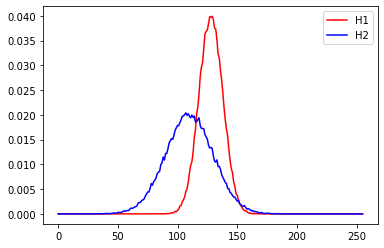

In [27]:
## cv2.compareHist(): 1차원 히스토그램 비교
# 0509.py
import cv2
import numpy as np
import time
from   matplotlib import pyplot as plt

#1
nPoints = 100000
pts1 = np.zeros((nPoints, 1), dtype=np.uint16)  
pts2 = np.zeros((nPoints, 1), dtype=np.uint16)

cv2.setRNGSeed(int(time.time()))
cv2.randn(pts1, mean=(128), stddev=(10)) # pts1에 nPoints개의 mean = 128, stddv = 10인 정규분포 난수를 생성
cv2.randn(pts2, mean=(110), stddev=(20)) # pts2에 nPoints개의 mean = 110, stddv = 20인 정규분포 난수를 생성

#2
H1 = cv2.calcHist(images=[pts1], channels=[0], mask=None, # pts1 히스토그램을 H1에 계산하고, cv2.CORM_L1 놈으로 정규화하여 sum(H1)이 1이 되게 하여 확률로 변경한다.
                    histSize=[256], ranges=[0, 256])
cv2.normalize(H1, H1, 1, 0, cv2.NORM_L1)
plt.plot(H1, color='r', label='H1')

H2 = cv2.calcHist(images=[pts2], channels=[0], mask=None, # pts2 히스토그램을 H2에 계산하고, cv2.CORM_L1 놈으로 정규화하여 sum(H2)이 1이 되게 하여 확률로 변경한다.
                    histSize=[256], ranges=[0, 256])
cv2.normalize(H2, H2, 1, 0, cv2.NORM_L1)

#3
d1 = cv2.compareHist(H1, H2, cv2.HISTCMP_CORREL)
d2 = cv2.compareHist(H1, H2, cv2.HISTCMP_CHISQR)
d3 = cv2.compareHist(H1, H2, cv2.HISTCMP_INTERSECT)
d4 = cv2.compareHist(H1, H2, cv2.HISTCMP_BHATTACHARYYA)
print('d1(H1, H2, CORREL) =',       d1)
print('d2(H1, H2, CHISQR)=',        d2)
print('d3(H1, H2, INTERSECT)=',     d3)
print('d4(H1, H2, BHATTACHARYYA)=', d4)

plt.plot(H2, color='b', label='H2')
plt.legend(loc='best')
plt.show()


EMD(S1, S2, DIST_L1) = 18.296119689941406
EMD(S1, S2, DIST_L2) = 18.296119689941406
EMD(S1, S2, DIST_C) = 18.296119689941406


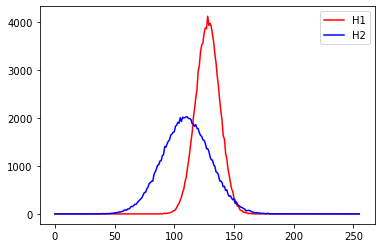

In [30]:
## cv2.EMD(): 1차원 히스토그램 비교
# 0510.py
import cv2
import numpy as np
import time
from   matplotlib import pyplot as plt

#1
nPoints = 100000
pts1 = np.zeros((nPoints, 1), dtype=np.uint16)
pts2 = np.zeros((nPoints, 1), dtype=np.uint16)

cv2.setRNGSeed(int(time.time()))
cv2.randn(pts1, mean=(128), stddev=(10)) # pts1에 nPoints개의 mean = 128, stddev = 10인 정규분포 난수를 생성한다.
cv2.randn(pts2, mean=(110), stddev=(20)) # pts2에 nPoints개의 mean = 110, stddev = 20인 정규분포 난수를 생성한다.

#2
H1 = cv2.calcHist(images=[pts1], channels=[0], mask=None, # pts1의 히스토그램을 H1에 계산한다.
                    histSize=[256], ranges=[0, 256])
##cv2.normalize(H1, H1, norm_type=cv2.NORM_L1)

H2 = cv2.calcHist(images=[pts2], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
##cv2.normalize(H2, H2, norm_type=cv2.NORM_L1)

#3
S1 = np.zeros((H1.shape[0], 2), dtype=np.float32) # 시그니쳐 배열 S1, S2의 0-열에 가중치로 각각 히스토그램 H1, H2을 복사하고,
S2 = np.zeros((H1.shape[0], 2), dtype=np.float32) # 1-열에 배열의 첨자를 위치정보로 하여, cv2.EMP() 함수로 cv2.DIST_L1, cv2.DIST_L2, cv2.DIST_C의 EMD를
##S1[:, 0] = H1[:, 0]                             # 각각 emd1, emd2, emd3에 계산하면, EMD가 모두 같다. 히스토그램을 정규화해도 같은 EMD를 갖는다.
##S2[:, 0] = H2[:, 0]                             # 정확히 같은 히스토그램에 대해 EMD를 계산하면 0이다.
for i in range(S1.shape[0]):
    S1[i, 0] = H1[i,0]
    S2[i, 0] = H2[i,0]
    S1[i, 1] = i
    S2[i, 1] = i

emd1, lowerBound, flow = cv2.EMD(S1, S2, cv2.DIST_L1)
print('EMD(S1, S2, DIST_L1) =',  emd1)

emd2, lowerBound, flow = cv2.EMD(S1, S2, cv2.DIST_L2)
print('EMD(S1, S2, DIST_L2) =',  emd2)

emd3, lowerBound, flow = cv2.EMD(S1, S2, cv2.DIST_C) 
print('EMD(S1, S2, DIST_C) =',  emd3)

plt.plot(H1, color='r', label='H1')
plt.plot(H2, color='b', label='H2')
plt.legend(loc='best')
plt.show()


### 히스토그램 평활화(Equalization)

- cv2.equalizeHist(src[, dst])

##### src는 1채널 8비트 영상이고, dst는 src와 같은 크기, 같은 종류의 히스토그램 평활화된 출력 영상이다. 히스토그램 평활화 알고리즘은 다음과 같다.
##### a. src 영상에서 256개의 빈에 히스토그램 hist를 계산한다.
##### b. hist의 누적합계 cdf를 계산한다.
##### c. cdf에서 0을 제외한 최소값과 최대값을 계산한다.
##### d. 변환표 T를 계산한다.

In [34]:
## 배열의 히스토그램 평활화
# 0511.py
import cv2
import numpy as np

src = np.array([[2, 2, 4, 4],
                [2, 2, 4, 4],
                [4, 4, 4, 4],
                [4, 4, 4, 4]
              ], dtype=np.uint8) # 배열 src는 화소값의 범위가 [2,4]로 좁은 범위에 걸쳐 있어 어두운 영상이다.
#1
dst = cv2.equalizeHist(src)      # dst = cv2.equalizeHist(src)에서 저대비 영상 src를 히스토그램 평활화한 결과 영상인 dst는 화소값의 범위가 [0, 255]로 넓은 고대비 영상이다.
print('dst =', dst)

#2                               # 히스토그램 평활화한 알고리즘을 직접 구현한다.
'''
ref: https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html
'''
##hist = cv2.calcHist(images = [src], channels = [0], mask = None,
##                    histSize = [256], ranges = [0, 256])
hist,bins = np.histogram(src.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0) # cdf에서 0을 True 마스킹  
T = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
T = np.ma.filled(T, 0).astype('uint8') # 마스킹을 0으로 채우기 
dst2 = T[src] # dst2 == dst
print('dst2 =', dst2)


dst = [[  0   0 255 255]
 [  0   0 255 255]
 [255 255 255 255]
 [255 255 255 255]]
dst2 = [[  0   0 255 255]
 [  0   0 255 255]
 [255 255 255 255]
 [255 255 255 255]]


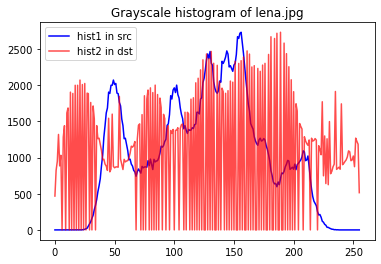

In [36]:
## 그레이스케일 영상의 히스토그램 평활화
# 0512.py
import cv2
import numpy as np
from   matplotlib import pyplot as plt

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
dst = cv2.equalizeHist(src)                                # 그레이스케일 영상 src를 cv2.equalizeHist()로 히스토그램 평활화한 영상 dst
cv2.imshow('dst',  dst)
cv2.waitKey()    
cv2.destroyAllWindows()

plt.title('Grayscale histogram of lena.jpg')

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
plt.plot(hist1, color='b', label='hist1 in src')

hist2 = cv2.calcHist(images=[dst], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
plt.plot(hist2, color='r', alpha=0.7, label='hist2 in dst')
plt.legend(loc='best')
plt.show()


In [1]:
## 컬러 영상의 히스토그램 평활화
# BGR 컬러 영상 src를 BGR 컬러 영상의 히스토그램의 평활화는 HSV,YCrCb 등의 컬러 모델로 변환을 한 후에
# 밝기값 채널(V, Y)에 히스토그램 평활화를 적용하고 BGR 컬러 영상으로 변환한다.
# 0513.py
import cv2
import numpy as np

src = cv2.imread('./data/lena.jpg')
cv2.imshow('src',  src)

#1
hsv    = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)        # cv2.cvtColor()로 BGR컬러 영상 src를 HSV 컬러 영상 hsv로 변환
h, s, v = cv2.split(hsv)                             # cv2.split()로 hsv를 h, s, v에 채널 분리

v2 = cv2.equalizeHist(v)                             # v를 v2에 히스토그램 평활화
hsv2 = cv2.merge([h, s, v2])                         # 분리된 채널을 cv2.merge()로 [h, s, v2]를 hsv2에 채널 합성
dst    = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)       # cv2.cvtColor()로 HSV컬러 영상 hsv2를 BGR 컬러 영상 dst로 변환
cv2.imshow('dst',  dst)

#2
yCrCv = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
y, Cr, Cv = cv2.split(yCrCv)

y2 = cv2.equalizeHist(y)
yCrCv2 = cv2.merge([y2, Cr, Cv])
dst2    = cv2.cvtColor(yCrCv2, cv2.COLOR_YCrCb2BGR)

cv2.imshow('dst2',  dst2)
cv2.waitKey()    
cv2.destroyAllWindows()


### CLAHE 히스토그램 평활화

1. 영상을 타일로 나누어 각 타일의 히스토그램을 계산한다.
2. 각 타일의 히스토그램에서 clopLimit보다 큰 값은 전체 빈에 재분배한다. clipLimit는 히스토그램 크기와 타일의 크기를 고려하여 계산한다.
3. 각 타일의 히스토그램 평활화를 수행하고, 타일 경계에서 문제를 해결하기 위하여 4개의 이웃 타일의 히스토그램을 이용하여 양선형 보간한다.

- cv2.createCLAHE([, clipLimit[, tileGridSize]])

##### cv2.createCLAHE()는 대비제한 임계값과 타일 그리드 크기를 이용하여 CLAHE 객체를 생성한다.

- cv2.create.apply(src[, dst])

##### apply() 메소드는 src영상에 CLAHE를 적용하여 히스토그램을 평활화한다.

#### 실습

In [5]:
## CLAHE 히스토그램 평활화
# 0514.py
import cv2
import numpy as np

src = np.array([[2, 2, 2, 2, 0,   0,   0,   0],
                [2, 1, 1, 2, 0,   0,   0,   0],
                [2, 1, 1, 2, 0,   0,   0,   0],
                [2, 2, 2, 2, 0,   0,   0,   0],
                [0, 0, 0, 0, 255, 255, 255, 255],
                [0, 0, 0, 0, 255, 1,   1,   255],
                [0, 0, 0, 0, 255, 1,   1,   255],
                [0, 0, 0, 0, 255, 255, 255, 255]], dtype=np.uint8)

#1
clahe = cv2.createCLAHE(clipLimit=40, tileGridSize=(1,1))  # clipLimit = 40, tileGridSize = (1,1)로 clahe 객체를 생성하고
dst = clahe.apply(src)                                     # clahe.apply(src)로 src를 적용하여 평활화한다.. tileGridSize = (1,1), tileArea = 8x8이다.
print("dst=\n", dst)                                       # 8-비트 그레이스케일 영상에서 histSize = 256이므로, clipLimit = 40 * 64 /256 = 10이다.
                                                           # tileGridSize = (1,1)이므로 히스토그램은 1개만 계산한다. 히스토그램에서 clipLimit = 10보다 큰 값은
                                                           # 히스토그램에 균등하게 재분배한다.
#2
clahe2 = cv2.createCLAHE(clipLimit=40, tileGridSize=(2,2))
dst2 = clahe2.apply(src)
print("dst2=\n", dst2)


dst=
 [[116 116 116 116  44  44  44  44]
 [116  76  76 116  44  44  44  44]
 [116  76  76 116  44  44  44  44]
 [116 116 116 116  44  44  44  44]
 [ 44  44  44  44 255 255 255 255]
 [ 44  44  44  44 255  76  76 255]
 [ 44  44  44  44 255  76  76 255]
 [ 44  44  44  44 255 255 255 255]]
dst2=
 [[ 80  80  80  72  32  40  48  48]
 [ 80  48  48  72  32  40  48  48]
 [ 80  48  48  72  32  40  48  48]
 [ 72  72  72  66  32  36  40  40]
 [ 32  32  32  32 255 255 255 255]
 [ 40  40  40  36 255  48  48 255]
 [ 48  48  48  40 255  48  48 255]
 [ 48  48  48  40 255 255 255 255]]


In [6]:
## CLAHE 구현
#0515.py
'''
ref1: https://github.com/opencv/opencv/blob/master/modules/imgproc/src/clahe.cpp#L157 
ref2:http://www.realtimerendering.com/resources/GraphicsGems/gemsiv/clahe.c
ref3:https://gist.github.com/sadimanna/52c320ce5c49e200ce398f800d39a2c1#file-clahe-py

'''
# CLAHE 알고리즘을 ref1: OpenCv 소스, ref2: Graphics Gems IV, ref3을 참고하여 작성하였다.
# 영상 크기와 타일의 크기에 따라 패딩이 필요할 수 있지만, 여기서는 패딩 없이, histSize = 256로 히스토그램을 계산하고, 히스토그램 재분배를 한 번만 수행하여 구현하였다.
import cv2
import numpy as np

#1
src = np.array([[2, 2, 2, 2, 0,   0,   0,   0],                           
                [2, 1, 1, 2, 0,   0,   0,   0],
                [2, 1, 1, 2, 0,   0,   0,   0],
                [2, 2, 2, 2, 0,   0,   0,   0],
                [0, 0, 0, 0, 255, 255, 255, 255],
                [0, 0, 0, 0, 255, 1,   1,   255],
                [0, 0, 0, 0, 255, 1,   1,   255],
                [0, 0, 0, 0, 255, 255, 255, 255]], dtype=np.uint8)

#2
def interpolate(sub_image, UL,UR,BL,BR):
    dst = np.zeros(sub_image.shape)
    sY, sX = sub_image.shape
    area = sX*sY
    #print("sX={}, sY={}".format(sX, sY))

    for y in range(sY):
        invY = sY-y
        for x in range(sX):
            invX = sX-x
            val = sub_image[y, x].astype(int)
            dst[y,x] = np.floor((invY*(invX*UL[val] + x*UR[val])+\
                                    y*(invX*BL[val] + x*BR[val]) )/area)          
    return dst
# interpolate() 함수는 4-개의 타일의 히스토그램 평활화 변환표인 UL, UR, BL, BR을 이용하여 sub_image를 dst에 양선형 보간한다.
# UL은 UL변환표로 val을 평활화한 결과이다.

#3
def CLAHE(src, clipLimit = 40.0, tileX = 8, tileY = 8):
# src영상에서 대비 제한 적응 평활화한 결과 dst을 반환하는 CLAHE()함수를 정의한다.

#3-1
    histSize = 256    
    tileSizeX = src.shape[1]//tileX
    tileSizeY = src.shape[0]//tileY
    tileArea  = tileSizeX*tileSizeY
    clipLimit = max(clipLimit*tileArea/histSize, 1)
    lutScale = (histSize - 1) / tileArea
    print("clipLimit=", clipLimit)

    LUT = np.zeros((tileY, tileX, histSize))
    dst = np.zeros_like(src)
    #print("tileX={}, tileY={}".format(tileX, tileY))
# tileSizeX, tileSizeY는 타일의 픽셀 크기이고, tileArea은 픽셀 개수이다.
# clipLimit는 max(clipLimit * tileArea / histSize, 1)에 의해 다시 계산한다.
# lutScale은 누적 히스토그램 cdf에 곱할 스케일값이다.
# LUT는 각 타일의 히스토그램 평활화를 위한 변환표이다.

#3-2: sublocks, tiles
    for iy in range(tileY):
        for ix in range(tileX):
            
#3-2-1
            y = iy*tileSizeY
            x = ix*tileSizeX
            roi = src[y:y+tileSizeY, x:x+tileSizeX] # tile
            
            tileHist, bins = np.histogram(roi, histSize,[0,256])
            #tileHist=cv2.calcHist([roi],[0],None,[histSize],[0,256]).astype(np.int)
            #tileHist = tileHist.flatten()                                           
            #print("tileHist[{},{}]=\n{}".format(iy, ix, tileHist))
# 타일의 히스토그램을 계산

#3-2-2                  
            if clipLimit > 0: # clip histogram
                clipped = 0
                for i in range(histSize):
                    if tileHist[i]>clipLimit:
                        clipped += tileHist[i] - clipLimit
                        tileHist[i] = clipLimit
        
                # redistribute clipped pixels    
                redistBatch = int(clipped/ histSize)
                residual = clipped - redistBatch * histSize
                
                for i in range(histSize):
                    tileHist[i] += redistBatch
                if residual != 0:
                    residualStep = max(int(histSize/residual), 1)
                    for i in range(0, histSize, residualStep):
                        if residual> 0:
                            tileHist[i] += 1
                            residual -= 1                            
            #print("redistributed[{},{}]=\n{}".format(iy, ix, tileHist))
# clipLimit보다 큰 히스토그램 빈의 크기의 합계를 clipped에 계산하고, clipped를 히스토그램에 균일하게 재분배한다.
            
#3-2-3:     calculate Lookup table for equalizing
            cdf = tileHist.cumsum()            
            tileLut = np.round(cdf*lutScale)
            LUT[iy, ix] = tileLut          
# 재분배된 히스토그램을 누적시켜 cdf를 계산하고, np.round(cdf * lutScale)로 히스토그램 평활화 변환표를 계산하여 LUT[iy, ix]에 저장한다.
# LUT[iy, ix]는 [iy, ix]타일의 변환표이다.
# LUT를 이용하여 각 타일별로 평활화하면 타일 경계 표시가 나타난다.
# cv2.equalizeHist()와 평활화 계산 방법이 다르다.

#3-3            
    # bilinear interpolation 
    y = 0
    for i in range(tileY+1):
        if i==0:  # top row
            subY = int(tileSizeY/2)
            yU = yB = 0
        elif i==tileY: # bottom row 
            subY = int(tileSizeY/2)
            yU= yB = tileY-1
        else:
            subY = tileSizeY
            yU = i-1
            yB = i
        #print("i={}, yU={}, yB={}, subY={}".format(i, yU, yB, subY))
        
        x = 0
        for j in range(tileX+1):
            if j==0: # left column
                subX = tileSizeX//2
                xL = xR = 0
            elif j==tileX: # right column
                subX = tileSizeX//2
                xL = xR = tileX-1
            else:
                subX = tileSizeX
                xL = j-1
                xR = j
            #print(" j={}, xL={}, xR={}, subX={}".format(j, xL, xR, subX))
            
            UL = LUT[yU,xL]
            UR = LUT[yU,xR]
            BL = LUT[yB,xL]
            BR = LUT[yB,xR]
            
            roi = src[y:y+subY, x:x+subX] 
            dst[y:y+subY, x:x+subX] = interpolate(roi,UL,UR,BL,BR)
            x += subX
        y += subY        
    return  dst
# 타일 경계 문제를 해졀하기 위하여, 부분영역이 포함하는 4개의 타일의 변환표를 이용한 히스토그램 평활화 결과를 양선형 보간한다.
# 9개 부분영역을 타일 4개를 이용하여 보간한다.
# 테두리는 부분영역의 크기가 다르다.
# 이 예제 프로그램에서 부분영역이 속한 타일 인덱스를 xL, xR, yU, yB로 계산하고, UL, UR, BL, BR은 해당 타일의 히스토그램 평활화 변환표이다.


#4 
##dst = CLAHE(src, clipLimit= 40.0, tileX= 1, tileY= 1)
##print("dst=", dst)
dst2 = CLAHE(src, clipLimit= 40.0, tileX= 2, tileY= 2)
print("dst=\n", dst2)
# CLAHE로 dst2에 CLAHE 평활화를 수행한다.
# clipLimit = max(clipLimit * tileArea / histSize, 1)에 의해 clipLimit = 2.5이다.

clipLimit= 2.5
dst=
 [[ 80  80  80  72  32  40  48  48]
 [ 80  48  48  72  32  40  48  48]
 [ 80  48  48  72  32  40  48  48]
 [ 72  72  72  66  32  36  40  40]
 [ 32  32  32  32 247 247 247 247]
 [ 40  40  40  36 247  48  48 243]
 [ 48  48  48  40 247  48  48 239]
 [ 48  48  48  40 247 243 239 239]]


In [12]:
## 히스토그램 평활화 비교
# 0516.py
import cv2
import numpy as np 
#1
src = cv2.imread('./data/tsukuba_l.png', cv2.IMREAD_GRAYSCALE) # 원본 영상 'tsukuba_1.png'파일을 src에 읽고 표시한다.
cv2.imshow('src', src)                                         # 대부분의 배경이 어둡고 조각상의 얼굴 부분만 밝은 영상이다.

#2
dst = cv2.equalizeHist(src)                                    # cv2.equalizeHist()로 전체 영상에 대해 하나의 히스토그램을 이용하여 dst에 평활화한 결과이다.
cv2.imshow('dst', dst)                                         # 영상전체가 밝아져서, 얼굴 부분의 윤곽선이 구분되지 않는다.

#3
clahe2 = cv2.createCLAHE(clipLimit=40, tileGridSize=(1,1))     # clahe2 = cv2.createCLAHE(clipLimit = 40, tileGridSize = (1, 1))로 하나의 히스토그램만을 가지고
dst2 = clahe2.apply(src)                                       # dst2에 CLAHE 히스토그램 평활화한다. 하나의 히스토그램만을 가지고 사용하기 떄문에 #2와 비슷한 결과가 나온다.
cv2.imshow('dst2', dst2)                                       # dst와 dst2는 정확히 같지는 않다. clahe는 히스토그램 재분배를 수행하고, 변환 테이블 계산 방법이
                                                               # cv2.equalizeHist()와 다르기 때문이다. 
                                                               # src 영상 전체의 히스토그램은 clipLimit = 40 * src.size / 256 = 17280.0 보다 큰 빈 값이 없기 때문에 재분배는 수행하지 않는다.

#4
clahe3 = cv2.createCLAHE(clipLimit=40, tileGridSize=(8,8))     # cv2.createCLAHE(clipLimit = 40, tileGridSize = (8, 8))로 tileGridSize = (8, 8)개의 타일로
dst3 = clahe3.apply(src)                                       # 나누어 dst3에 CLAHE 히스토그램 평활화한다. dst3은 배경뿐만 아니라 얼굴 부분에서
cv2.imshow('dst3', dst3)                                       # dst, dst2에 비해 대비가 선명한 영상을 얻는다.

cv2.waitKey()    
cv2.destroyAllWindows()
